In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from cmocean import cm as cmo
from matplotlib import ticker, cm
import seaborn as sns

## Load siderophore relative abundances at DCM

Note for future self: [Very handy chart](https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_r.html) for converting dplyr syntax to pandas

In [8]:
simons = pd.read_csv("../data/simons2plot.tsv", delimiter='\t')
simons.head()

,lat,lon,section,RA,logRA
0,31.667,-64.167,BATS,0.050000,-1.301030
1,22.750,-158.000,HOT,0.262493,-0.580883
2,34.328,-55.432,GA02,0.050000,-1.301030
3,13.162,-53.422,GA02,0.050000,-1.301030
4,9.546,-50.469,GA02,0.050000,-1.301030


In [3]:
tara = pd.read_csv("../data/tara2plot.tsv", delimiter='\t')
tara.head()

,lat,lon,section,RA,logRA
0,36.553,-6.567,tara_oceans,0.177335,-0.751206
1,35.756,14.267,tara_oceans,0.050000,-1.301030
2,42.189,17.720,tara_oceans,0.050000,-1.301030
3,39.394,19.395,tara_oceans,0.050000,-1.301030
4,33.922,32.841,tara_oceans,0.050000,-1.301030


### Plotting

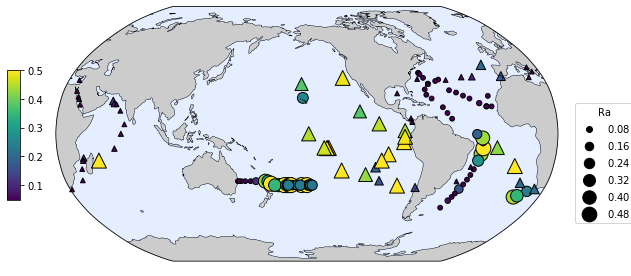

In [12]:
scale = 450

fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=205))
ax.set_global()
ax.add_feature(cfeature.COASTLINE, edgecolor='#000000', linewidth=0.5)
ax.add_feature(cfeature.LAND, facecolor='#CCCCCC')
ax.add_feature(cfeature.OCEAN, facecolor='#E4EEFF')

myscat0 = ax.scatter(simons.lon, simons.lat, 
           edgecolor = '#000000',
           c=simons.RA,
           #s=70,
           s=(scale*simons.RA),
           cmap="viridis",
           vmin=0.05, 
           vmax=0.5,
           alpha=1,
           marker='o',
           transform=ccrs.PlateCarree())

myscat1 = ax.scatter(tara.lon, tara.lat, 
           edgecolor = '#000000',
           c=tara.RA,
           #s=70,
           s=(scale*tara.RA),
           cmap="viridis",
           vmin=0.05, 
           vmax=0.5,
           alpha=1,
           marker='^',
           transform=ccrs.PlateCarree())

cbar_ax = fig.add_axes([0.05, 0.35, 0.02, 0.3])
mycbar = fig.colorbar(myscat1, cax=cbar_ax)
mycbar.set_label("", rotation=270)

kw = dict(prop="sizes", num=7, func=lambda s: (s/scale))
fig.legend(*myscat0.legend_elements(**kw), loc=[0.91, 0.19], title="Ra")

plt.savefig("../figs/pro_metagenome_sidero_map.svg", dpi=300, format="svg")
plt.savefig("../figs/pro_metagenome_sidero_map.png", dpi=300, format="png")